In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'sklearn'

In [19]:
df = pd.read_csv('/content/Mall_Customers.csv', encoding='ISO-8859-1')

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [30]:
print(df.isnull().values.any())

False


In [12]:
!pip3 install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.2 MB/s eta 

In [13]:
from pycaret.regression import *

In [23]:
scaler = MinMaxScaler()

In [24]:
df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [26]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [27]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,0.019231,0.000000,0.387755
1,2,0,0.057692,0.000000,0.816327
2,3,1,0.038462,0.008197,0.051020
3,4,1,0.096154,0.008197,0.775510
4,5,1,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,1,0.326923,0.860656,0.795918
196,197,1,0.519231,0.909836,0.275510
197,198,0,0.269231,0.909836,0.744898
198,199,0,0.269231,1.000000,0.173469


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

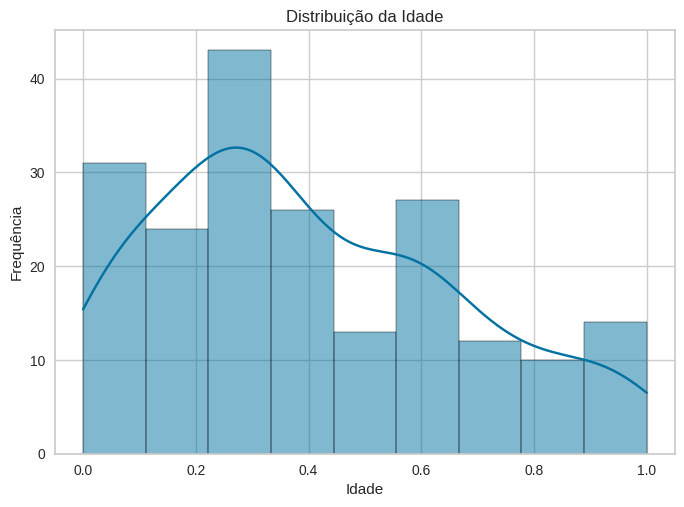

In [33]:
# Plota um gráfico de distribuição
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

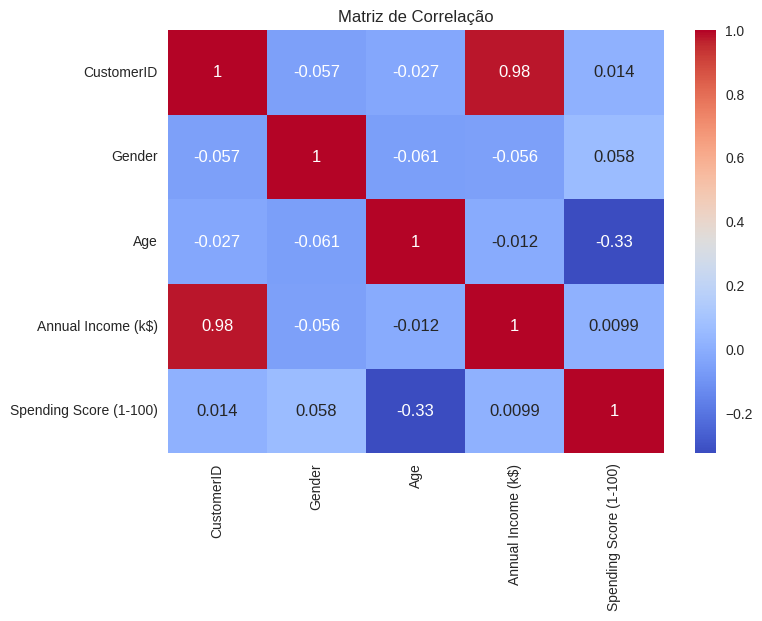

In [34]:
# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Plota uma matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [35]:
s = setup(data=df, target='Spending Score (1-100)', session_id=123)

,Description,Value
0,Session id,123
1,Target,Spending Score (1-100)
2,Target type,Regression
3,Original data shape,"(200, 5)"
4,Transformed data shape,"(200, 5)"
5,Transformed train set shape,"(140, 5)"
6,Transformed test set shape,"(60, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [36]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1614,0.0496,0.2181,0.1421,0.1489,0.8965,0.2450
ada,AdaBoost Regressor,0.1752,0.0528,0.2254,0.0987,0.1542,1.0073,0.0610
rf,Random Forest Regressor,0.1617,0.0545,0.2267,0.0506,0.1536,0.8463,0.2260
catboost,CatBoost Regressor,0.1630,0.0589,0.2351,0.0355,0.1609,0.9775,0.9720
gbr,Gradient Boosting Regressor,0.1654,0.0561,0.2299,0.0218,0.1572,0.9282,0.0950
ridge,Ridge Regression,0.2074,0.0637,0.2473,-0.0659,0.1705,1.2387,0.1310
br,Bayesian Ridge,0.2061,0.0642,0.2482,-0.0693,0.1709,1.2524,0.0650
et,Extra Trees Regressor,0.1658,0.0620,0.2412,-0.0715,0.1625,0.8707,0.2020
lr,Linear Regression,0.2104,0.0653,0.2505,-0.0998,0.1728,1.2423,0.5940
lar,Least Angle Regression,0.2104,0.0653,0.2505,-0.0998,0.1728,1.2423,0.0870


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [37]:
tuned_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1270,0.0329,0.1814,0.5544,0.1150,0.9480
1,0.2402,0.0939,0.3064,0.1420,0.2234,1.6688
2,0.1131,0.0218,0.1478,0.0118,0.1009,0.2020
3,0.2019,0.0611,0.2472,0.0708,0.1704,1.0616
4,0.2010,0.0756,0.2749,0.0228,0.1736,0.6063
5,0.1750,0.0416,0.2039,0.3813,0.1513,1.2971
6,0.1382,0.0386,0.1965,0.3512,0.1344,0.7621
7,0.1501,0.0389,0.1972,0.2610,0.1213,0.2960
8,0.1691,0.0576,0.2401,-0.0014,0.1752,1.7778


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [42]:
predictions = predict_model(best_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.1337,0.0345,0.1857,0.5008,0.1290,0.7102


In [45]:
save_model(best_model, 'modelo_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Gender', 'Age',
                                              'Annual Income (k$)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'modelo_pycaret.pkl')

In [44]:
create_api(best_model, 'minha_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python minha_api.py


In [ ]:
!python minha_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [14645]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
